In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [3]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('muted')

In [4]:
# Загрузка данных по СOVID_19
covid_data = pd.read_csv('covid_19_data.csv', sep = ',', index_col=[1], parse_dates=[1])

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14491 entries, 2020-01-22 to 2020-04-12
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             14491 non-null  int64  
 1   Province/State  7386 non-null   object 
 2   Country/Region  14491 non-null  object 
 3   Last Update     14491 non-null  object 
 4   Confirmed       14491 non-null  float64
 5   Deaths          14491 non-null  float64
 6   Recovered       14491 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 905.7+ KB


In [6]:
covid_data.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
# По каким странам есть статистика
covid_data['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [8]:
# Выберем данные по Италии
data_italy = covid_data.loc[covid_data['Country/Region'] == 'Italy', :]

In [9]:
data_italy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2020-01-31 to 2020-04-12
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             73 non-null     int64  
 1   Province/State  0 non-null      object 
 2   Country/Region  73 non-null     object 
 3   Last Update     73 non-null     object 
 4   Confirmed       73 non-null     float64
 5   Deaths          73 non-null     float64
 6   Recovered       73 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.6+ KB


In [10]:
data_italy.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-31,481,NaN,Italy,1/31/2020 23:59,2.0,0.0,0.0
2020-02-01,540,NaN,Italy,1/31/2020 8:15,2.0,0.0,0.0
2020-02-02,609,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
2020-02-03,676,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
2020-02-04,744,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0


In [11]:
data_italy.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,73.0,5303.589041,4200.141396,481.0,1765.0,3770.0,8587.0,14252.0
Confirmed,73.0,38598.684932,51647.042115,2.0,3.0,5883.0,74386.0,156363.0
Deaths,73.0,4347.164384,6390.309804,0.0,0.0,233.0,7503.0,19899.0
Recovered,73.0,6071.342466,9440.633412,0.0,0.0,589.0,9362.0,34211.0


In [12]:
# Сделаем отбор по колонке 'Confirmed' - подтверждённые случаи заражения
data = pd.DataFrame.from_records(data_italy, columns=['Confirmed'], index=data_italy.index)
data.shape

(73, 1)

In [13]:
data.head()

,Confirmed
ObservationDate,
2020-01-31,2.0
2020-02-01,2.0
2020-02-02,2.0
2020-02-03,2.0
2020-02-04,2.0


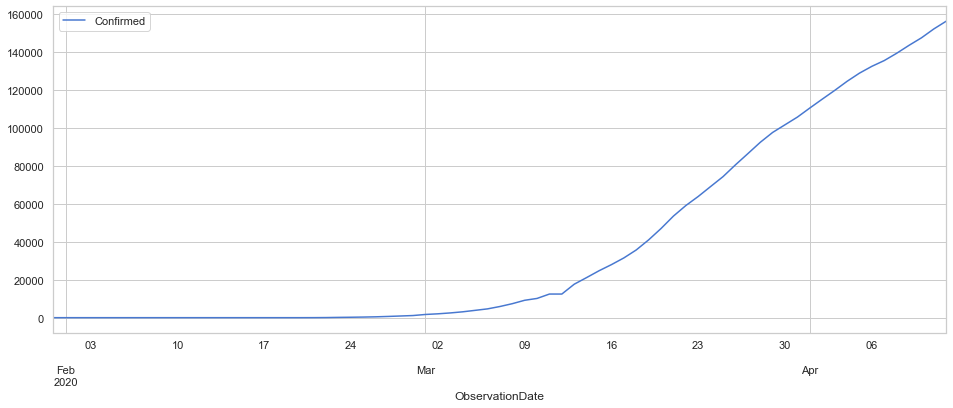

In [14]:
data.plot(figsize=(16,6))

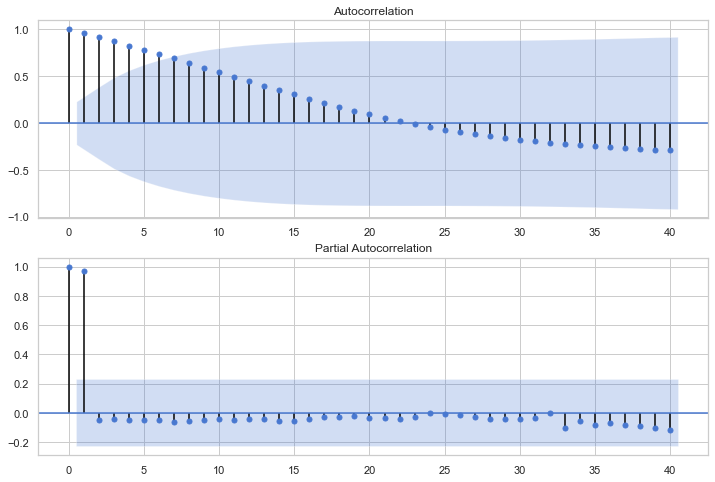

In [15]:
# Получим оценку автокорреляции модели по иcходному ряду
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.Confirmed.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.Confirmed.values, lags=40, ax=ax2)

In [16]:
# Для проверки стационарности ряда проведем обобщенный тест Дикки-Фуллера на наличие единичных корней.
test = sm.tsa.adfuller(data.Confirmed)
print(f'adf: {test[0]}')
print(f'p-value: {test[1]}')
print(f'Critical values: {test[4]}')
if test[0] > test[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен')
else:
    print('Единичных корней нет, ряд стационарен')

adf: 2.066382491676842
p-value: 0.9987532379415742
Critical values: {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}
Есть единичные корни, ряд не стационарен


In [17]:
# Возьмём первую разность
diff1 = data.diff(periods=1).dropna()

In [19]:
test = sm.tsa.adfuller(diff1.Confirmed)
print(f'adf: {test[0]}')
print(f'p-value: {test[1]}')

adf: -1.896831875739152
p-value: 0.33355296105555066


In [20]:
diff14 = diff1.diff(4).dropna()

In [21]:
test = sm.tsa.adfuller(diff14.Confirmed)
print(f'adf: {test[0]}')
print(f'p-value: {test[1]}')

adf: -3.6223626656529246
p-value: 0.00534761541185882


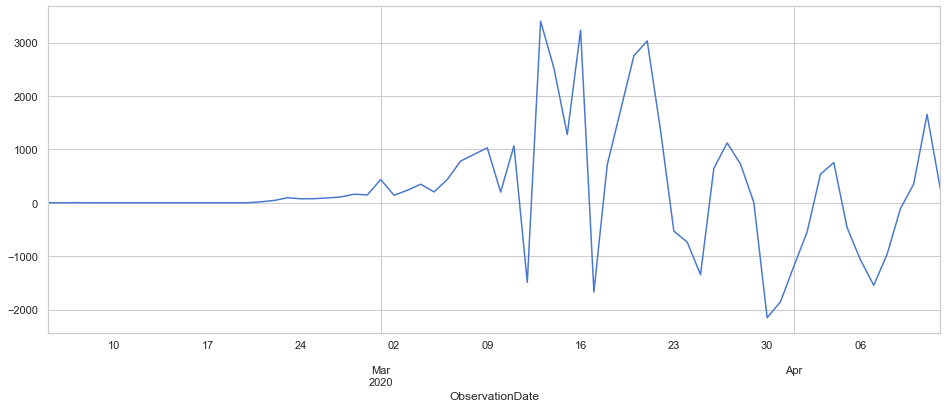

In [22]:
diff14.Confirmed.plot(figsize=(16,6))

Критерий Дики-Фуллера: p=0.005348


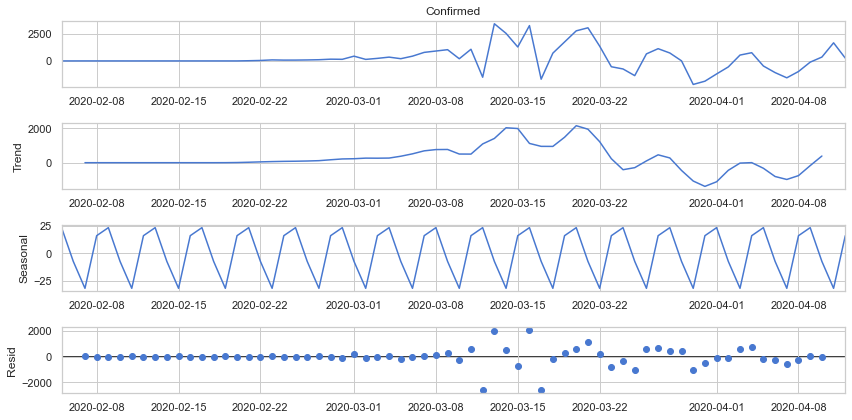

In [23]:
matplotlib.rcParams.update({'figure.figsize': (12,6)})
sm.tsa.seasonal_decompose(diff14['Confirmed'], period=4).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(diff14['Confirmed'])[1])

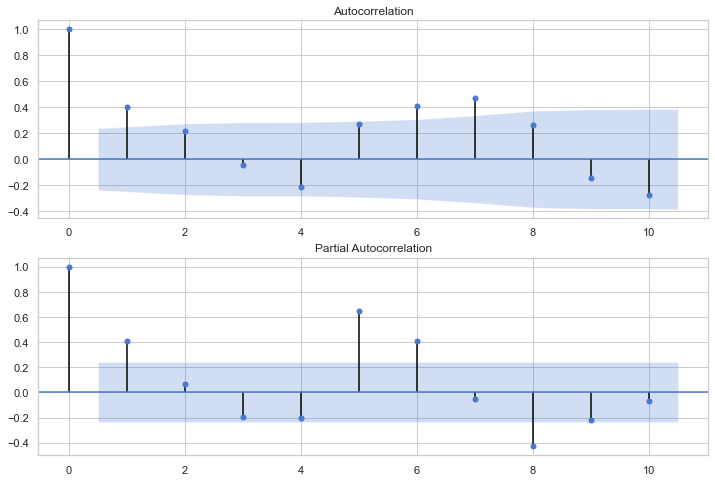

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff14.Confirmed.values, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff14.Confirmed.values, lags=10, ax=ax2)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
N = 10
# строим модель
model = ARIMA(data[:-N], order=(1, 1, 1), freq='D').fit(full_output=False, disp=0)

In [27]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -501.305
Method:                       css-mle   S.D. of innovations            770.591
Date:                Sun, 12 Jul 2020   AIC                           1010.610
Time:                        15:14:43   BIC                           1019.118
Sample:                    02-01-2020   HQIC                          1013.950
                         - 04-02-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2161.4658   1841.940      1.173      0.241   -1448.671    5771.602
ar.L1.D.Confirmed     0.9819      0.019     50.796      0.000       0.944       1.020
ma.L1.D.Confirmed    -0.

Расчитаем коэффициент детерминации $R^2$, чтобы понять какой процент наблюдений описывает данная модель:

In [28]:
y_p = model.predict(len(data[:-N]), len(data[:-1]), typ='levels')

In [29]:
from sklearn.metrics import r2_score
r2_score(data[-10:], y_p)

0.970164933419317

In [30]:
y_f = model.forecast(N*2)

In [31]:
date_f = pd.date_range('2020-04-03', '2020-04-22', freq="D")

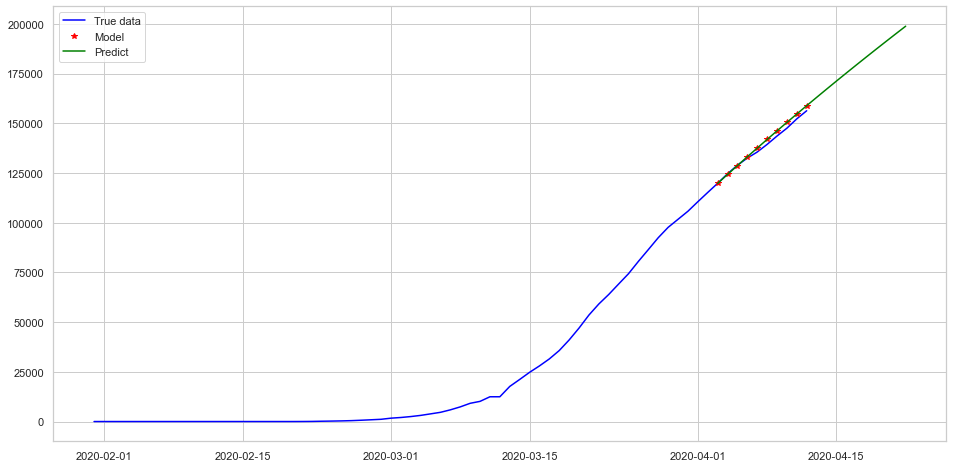

In [32]:
plt.figure(figsize=(16,8))
plt.plot(data[:],'b',label ='True data')
#plt.plot(data[-10:],'r',label ='true')
plt.plot(y_p,'*r',label ='Model')
plt.plot(date_f,y_f[0],'g',label ='Predict')
plt.legend()
plt.show()